In [1]:
# IMPORT STATEMENTS
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path = ["/booleanfs2/sahoo/BoNE/"] + sys.path

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3
        
import SMaRT.MacUtils as mut
reload(mut)

<module 'SMaRT.MacUtils' from '/booleanfs2/sahoo/BoNE/SMaRT/MacUtils.py'>

In [70]:
import pandas as pd
import numpy as np
import bone
reload(bone)
import Datasets
reload(Datasets)
import Datasets_hh
reload(Datasets_hh)
hu = bone.hu

# Figure 3

Yael_All mArray 2019 [human] (n = 70)
GSE13896 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=T131
58 [24, 34] GSE13896 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=T131 T131
[106]
Yael mArray 2019 [human] (n = 24)
GSE8823 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=T129
24 [11, 13] GSE8823 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=T129 T129
[106]
Woodruff 2005 mac (n = 45)
GSE2125 http://hegemon.ucsd.edu/Tools/explore.php?key=mac&id=MAC12
30 [15, 15] GSE2125 http://hegemon.ucsd.edu/Tools/explore.php?key=mac&id=MAC12 MAC12
[106]
Thomas mArray 2019 [human] (n = 23)
GSE27002 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=T128
23 [10, 13] GSE27002 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=T128 T128
[49]
OBeirne 2020 balf (n = 88)
GSE130928 http://hegemon.ucsd.edu/Tools/explore.php?key=lung&id=LU32
66 [24, 42] GSE130928 http://hegemon.ucsd.edu/Tools/explore.php?key=lung&id=LU32 LU32
[106]
Ellen Bluk 2022 [human] (n = 41)


Text(0.5, 1.0, 'Shaykhiev 2009 balf COPD (GSE13896; n = 70)')

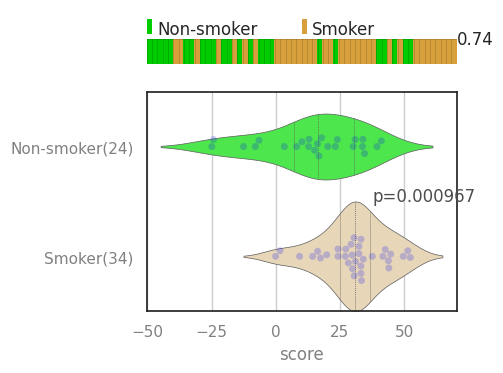

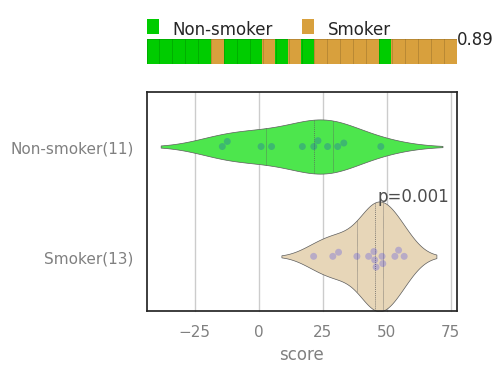

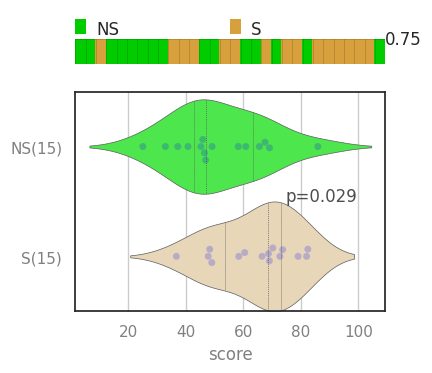

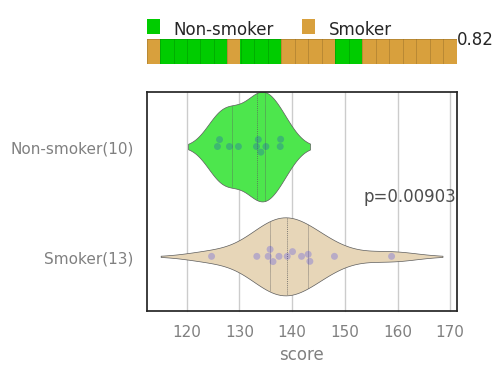

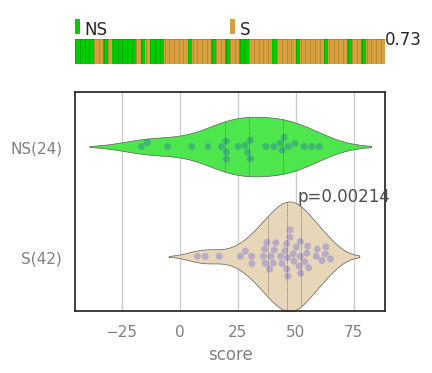

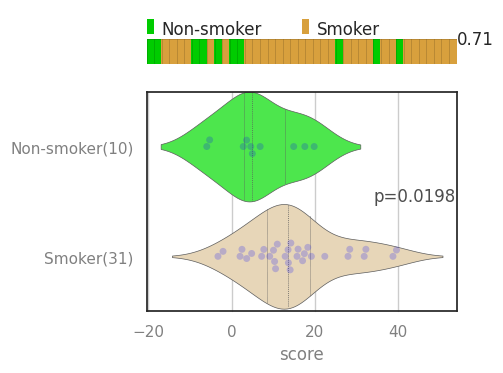

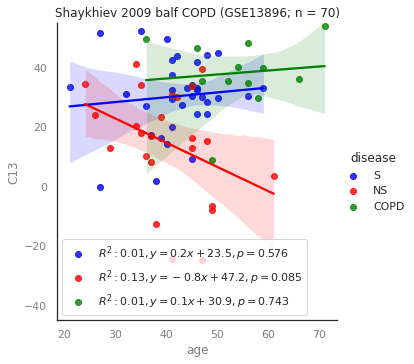

In [32]:
wt1, l1 = mut.getCls13()
ana = bone.IBDAnalysis()
ana.getYaelAll2019(1) # GSE13896
fig = bone.processData(ana, l1, wt1, desc=None, violin=1)

wt1, l1 = mut.getCls13()
ana = bone.IBDAnalysis()
ana.getYael2019(1) # GSE8823
fig = bone.processData(ana, l1, wt1, desc=None, violin=1)

wt1, l1 = mut.getCls13()
ana = bone.IBDAnalysis()
ana.getWoodruff2005mac(2) # GSE2125
fig = bone.processData(ana, l1, wt1, desc=None, violin=1)

wt1, l1 = mut.getCls13()
ana = bone.IBDAnalysis()
ana.getThomas2019(1) # GSE27002
fig = bone.processData(ana, l1, wt1, desc=None, violin=1)

wt1, l1 = mut.getCls13()
ana = bone.IBDAnalysis()
ana.getOBeirne2020(2) # GSE130928
fig = bone.processData(ana, l1, wt1, desc=None, violin=1)

wt1, l1 = mut.getCls13()
ana = bone.IBDAnalysis()
ana.getEllen2022(1) # GSE155213
fig = bone.processData(ana, l1, wt1, desc=None, violin=1)

wt1, l1 = mut.getCls13()
ana = bone.IBDAnalysis()
ana.getShaykhiev2009()
ana.orderData(l1, wt1)
atype = ana.h.getSurvName("c desc")
disease = [str(i).split("-")[0] for i in atype]
atype = ana.h.getSurvName('c Age')
btype = ana.h.getSurvName('c age')
age = [None, None] + [float(atype[i]+btype[i]) for i in ana.h.aRange()]
sex = ana.h.getSurvName('c Sex')
ahash = {'female':1, 'male':0, 'M':0, 'F':1}
sex_n = [ahash[k] if k in ahash else None for k in sex]
df = pd.DataFrame()
df['C13'] = list(ana.f_ranks)
df['age'] = age[2:]
df['sex'] = sex[2:]
df['gender'] = sex_n[2:]
df['source'] = 'COPD1'
df['disease'] = disease[2:]
g = bone.sns.lmplot(x='age', y='C13', hue='disease',
                    palette=['blue', 'red', 'green', 'cyan'], data=df)
import scipy
ax = g.axes[0][0]
ax.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()
for i in range(len(g.hue_names)):
    k = g.hue_names[i]
    c1 = g.data[g._hue_var] == k
    x = g.data[g._x_var][c1]
    y = g.data[g._y_var][c1]
    r, p = scipy.stats.pearsonr(x, y)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
    label = r'$R^2:{0:.2f}, y={1:.1f}x+{2:.1f}, p={3:.3f}$'.format(
        r_value**2, slope,intercept, p_value)
    L_labels[i].set_text(label)
ax.set_ylim([-45, 55])
ax.set_title(ana.h.getTitle())
# pdf.savefig(transparent=True, bbox_inches = 'tight')
